<a href="https://colab.research.google.com/github/naomori/codexa_LinearRegression_Practice/blob/master/Chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 特徴量１つのロジスティック回帰

コーディングとしては以下を行う
* CSVファイルの読み込み
* 探索的データ分析（Exploratory Data Analysis）
* ラベルエンコーディング
* 訓練データとテストデータの分割
* 単一特徴量のロジスティック回帰モデルの訓練と評価
* テストデータを利用したモデル評価

## Section.1 データとライブラリのインポート

In [0]:
# データの可視化および処理を行うライブラリ
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [0]:
# 機械学習ライブラリ「Scikit-learn」のインポート
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [0]:
# スタイルと設定
sns.set(style="dark")
sns.set(style="darkgrid", color_codes=True)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [4]:
# Google Colabへファイルをアップロードする
from google.colab import files
uploaded = files.upload() 

Saving mushrooms.csv to mushrooms (1).csv


In [0]:
# CSVファイルの読み込み
mushroom = pd.read_csv('mushrooms.csv')

## Seciton.2: 探索的データ解析（Explanatory Data Analysis: EDA）

新しいデータを扱う際には、EDAにより以下を理解する必要がある。
* データセットの知っておくべき前提・特徴
* データセットの可視化による特徴



In [6]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


describe()関数により、データセットの基本統計量を確認する。  
基本統計量とは、データの基本的な特性を示すもの。  
全体を知らべて、特徴や傾向を把握するための指標の１つ。

In [7]:
mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


欠損値がないかどうかを確認します。

In [8]:
mushroom.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

ターゲットと各特徴量のデータを可視化して、関係性を把握します。  
それぞれの特徴量の値に対して、ターゲットとなる class (p or e)がどれくらい含まれているかを可視化します。

In [9]:
# [すべての行、class 以外の列]のカラムを mushcol に格納
mushcol = mushroom.iloc[:, 1:].columns

print(mushcol)
print(mushcol.size)

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')
22


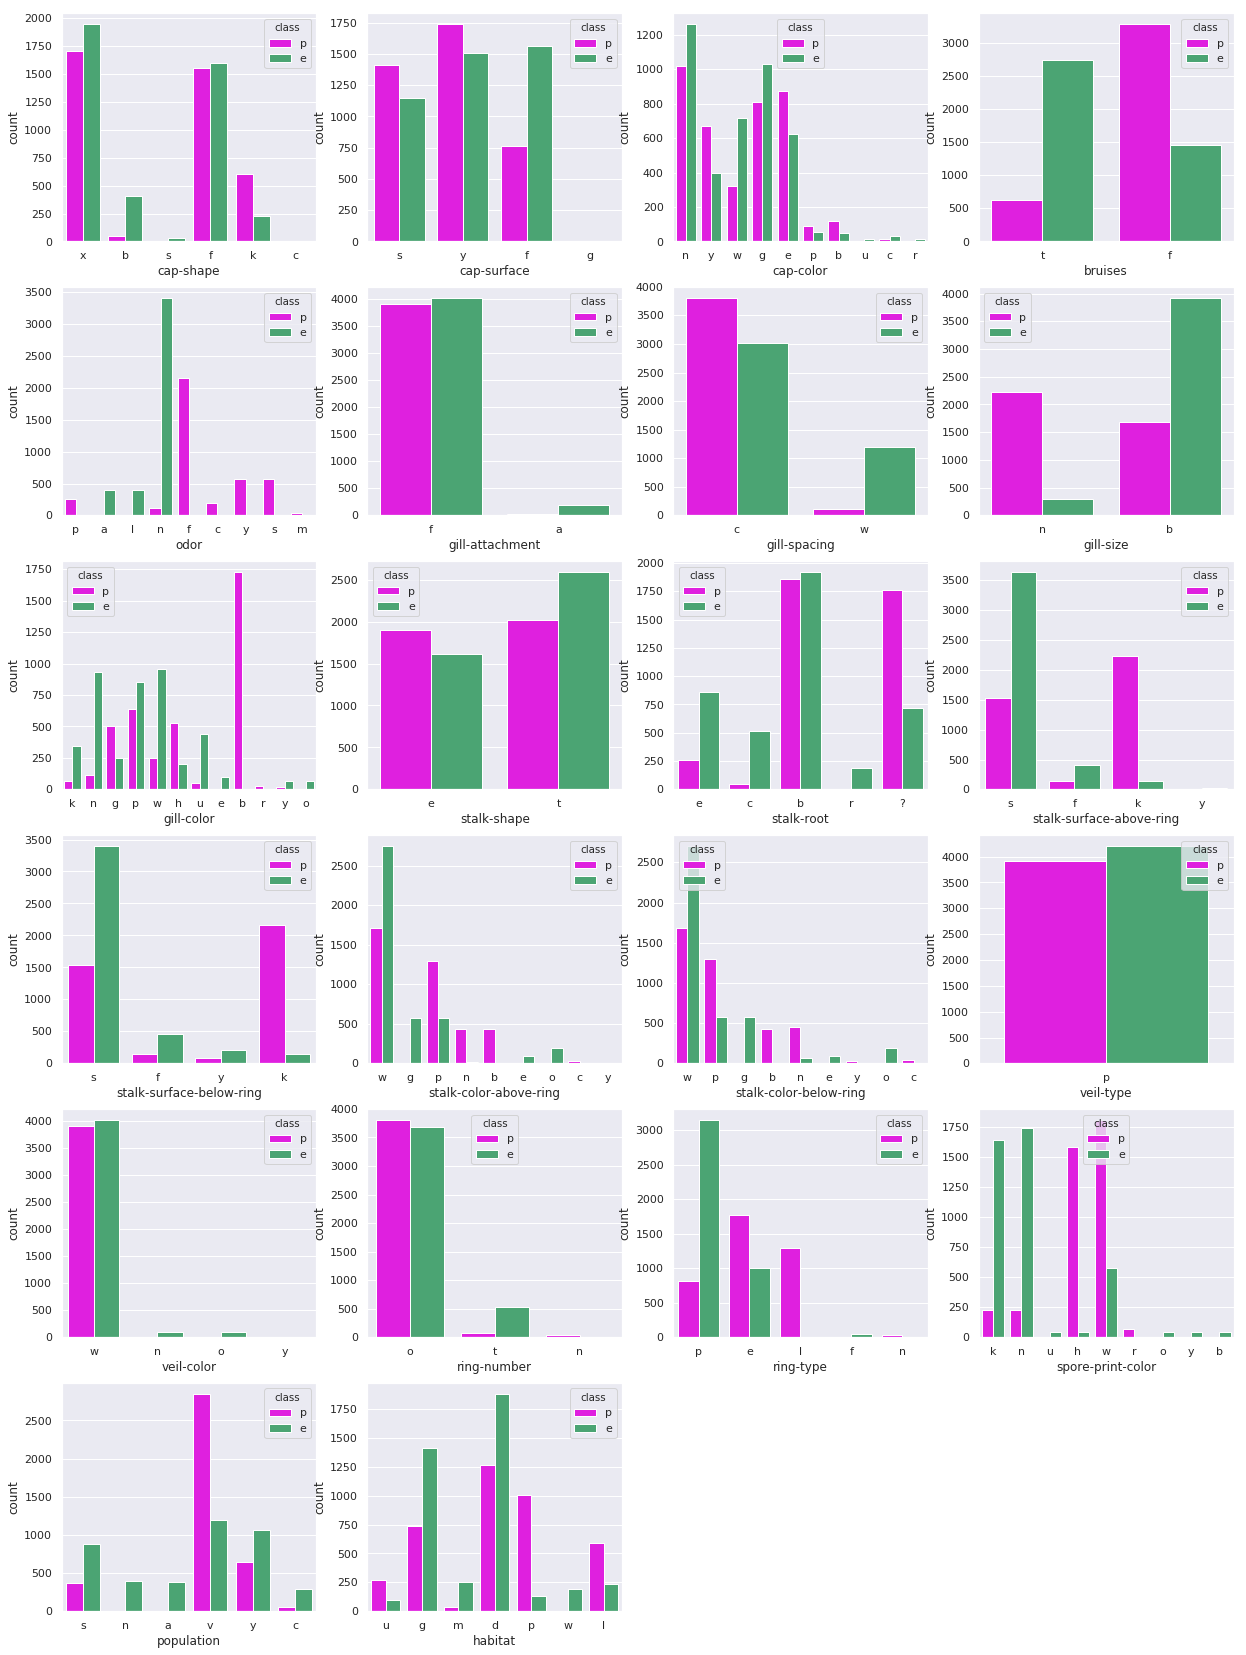

In [17]:
# figsize で図のサイズを決める。単位はインチ(width, height)。デフォルトは(8,6) 
# ここで指定したサイズの画面の中に、22個のグラフを収める必要がある。
plt.figure(figsize=((mushcol.size-1), (mushcol.size-1)*5))

# gridspec でレイアウト(必要なプロットの数)を決める
gs = gridspec.GridSpec(nrows=(mushcol.size-1), ncols=4)

for i, col in enumerate(mushroom[mushcol]):
  # print(i, col)
  ax = plt.subplot(gs[i])
  sns.countplot(x=col, hue='class', palette=['fuchsia', 'mediumseagreen'],
                data=mushroom)

odor に着目してみると、n（無臭）は圧倒的に e（食用）が多く、
f（悪臭）はほとんど毒性（p）が多くなっています。

このようにグラフで可視化することで、データのだいたいの傾向を把握できます。

## Section.3: データの前処理

前回と同様に特徴量（bruises）を使うようにします。

In [24]:
mushroom = mushroom[['class', 'bruises']]
print(mushroom.head())

  class bruises
0     p       t
1     e       t
2     e       t
3     p       t
4     e       f


In [26]:
# 特徴量をダミー変数トラップへの対策をします
# 特徴量をダミー変数へ変換
mushroomcol = mushroom.columns[1:]
print(mushroomcol)

Index(['bruises'], dtype='object')


In [31]:
mushroom2 = pd.get_dummies(mushroom, columns=mushroomcol, drop_first=True)
mushroom2.head()

,class,bruises_t
0,p,1
1,e,1
2,e,1
3,p,1
4,e,0


In [0]:
# 文字列から数値へ変換
labelencoder = LabelEncoder()
mushroom2['class'] = labelencoder.fit_transform(mushroom2['class'])

In [33]:
mushroom2.head()

,class,bruises_t
0,1,1
1,0,1
2,0,1
3,1,1
4,0,0


In [36]:
# ターゲットの値を確認
mushroom2['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

#### 訓練データとテストデータに分割

7:3 あるいは 8:2 に訓練データとテストデータを分割することが多い。

テストデータの分割には、Scikit-learn の train_test_split() 関数が非常に便利に使える。

In [40]:
# 訓練データとテストデータへスプリット
train_set, test_set = train_test_split(mushroom2, test_size = 0.2, random_state = 42)
print(train_set.head())
print(test_set.head())

      class  bruises_t
7873      1          0
6515      1          0
6141      1          0
2764      0          1
438       0          1
      class  bruises_t
1971      0          0
6654      1          0
5606      1          0
3332      0          1
6988      1          0


訓練データとテストデータの両方で、特徴量（X）とターゲット（y）にデータを分割する

In [0]:
# 訓練データの特徴量とターゲットを切り分ける
X_train = train_set.drop('class', axis=1)
y_train = train_set['class'].copy()

# テストデータの特徴量とターゲットを切り分ける
X_test = test_set.drop('class', axis=1)
y_test = test_set['class'].copy()

In [43]:
print(X_train.head())
print(y_train.head())

      bruises_t
7873          0
6515          0
6141          0
2764          1
438           1
7873    1
6515    1
6141    1
2764    0
438     0
Name: class, dtype: int64


# Section.4: モデルの訓練



In [48]:
# 訓練データをロジスティック回帰のモデルへ訓練
logclassifier = LogisticRegression(solver='lbfgs')
logclassifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Section.5: 予測とモデルの評価



In [0]:
# 訓練ずみモデルを使って訓練データから予測する
y_pred = logclassifier.predict(X_train)

### 混合行列（Confusion Matrix）でモデルを評価



In [51]:
# 混同行列を作成
cnf_matrix = confusion_matrix(y_train,y_pred)
cnf_matrix

array([[2205, 1160],
       [ 492, 2642]])

### 正解率（Accuracy）でモデルを評価

$正解率 = \frac{TP+TN}{TP+FP+FN+TN}$



In [52]:
# 正解率を計算する
accuracy_score(y_train, y_pred)

0.7458070472380366

### テストデータを使って評価



In [0]:
# 訓練ずみモデルからテストデータを使って予測
y_pred_test = logclassifier.predict(X_test)

In [54]:
# 混同行列を作成
cnf_matrix_test = confusion_matrix(y_test,y_pred_test)
cnf_matrix_test

array([[547, 296],
       [132, 650]])

In [55]:
# 正解率を計算する
accuracy_score(y_test, y_pred_test)

0.7366153846153846